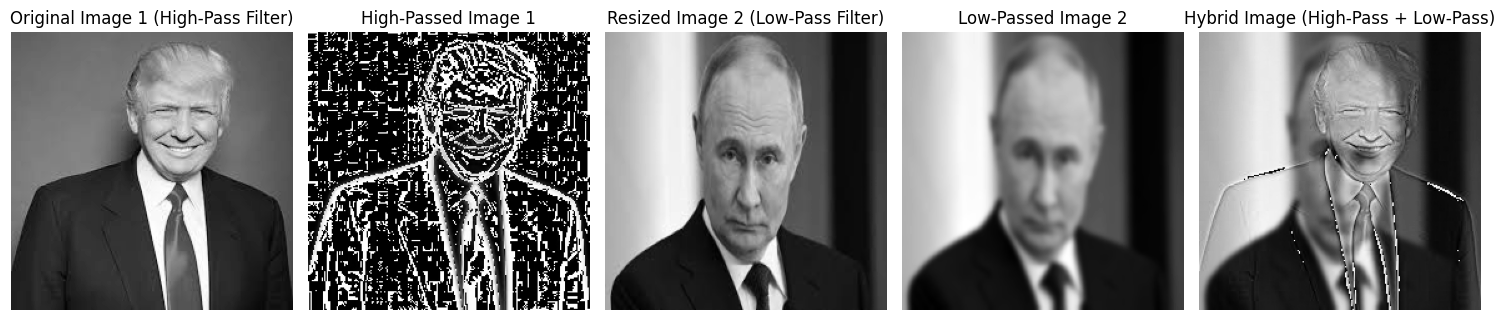

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Function to display multiple images in a grid
def display_images(images, titles, rows, cols):
    plt.figure(figsize=(15, 8))  # Set figure size
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')  # Turn off axes
    plt.tight_layout()
    plt.show()
# Load images
image1 = cv2.imread('image1.jpg')  # Apply high-pass filter on this image
image2 = cv2.imread('image2.jpg')  # Apply low-pass filter on this image
# Convert to grayscale for processing
image1_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
# Resize image2 to match the dimensions of image1
height, width = image1_gray.shape  # Get the dimensions of image1
image2_resized = cv2.resize(image2_gray, (width, height))  # Resize image2 to match image1's size
# Apply Gaussian Blur (Low-Pass Filter) to image2 (resized)
low_pass2 = cv2.GaussianBlur(image2_resized, (11, 11), 0)  # Low-Pass Filter for Image 2
# High-Pass Filter for image1 (subtract low pass from original)
low_pass1 = cv2.GaussianBlur(image1_gray, (11, 11), 0)  # Low-Pass Filter for Image 1
high_pass1 = image1_gray - low_pass1  # High-Pass Filter for Image 1
# Combine the High-Pass and Low-Pass images to make the Hybrid Image
hybrid_image = high_pass1 + low_pass2
# List of images and their titles
images = [
    image1_gray,       # Original Image 1
    high_pass1,        # High-Pass Filtered Image 1
    image2_resized,    # Resized Image 2
    low_pass2,         # Low-Pass Filtered Image 2
    hybrid_image       # Hybrid Image
]
titles = [
    "Original Image 1 (High-Pass Filter)",
    "High-Passed Image 1",
    "Resized Image 2 (Low-Pass Filter)",
    "Low-Passed Image 2",
    "Hybrid Image (High-Pass + Low-Pass)"
]
# Display all images in a 1x5 grid
display_images(images, titles, rows=1, cols=5)
